In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('vldb_pooled.csv')
for i in df.columns[1:]:
    df[i] = df[i].astype(float)
original_df = df.set_index('src_data')
original_df

,single,mimic3_eicu,mimic3_mimic4,all,single.1,mimic3_eicu.1,mimic3_mimic4.1,all.1,single.2,mimic3_eicu.2,...,mimic4_eicu.5,all.9,single.10,mimic3_mimic4.6,mimic4_eicu.6,all.10,single.11,mimic3_mimic4.7,mimic4_eicu.7,all.11
src_data,,,,,,,,,,,,,,,,,,,,,
readm,0.076,0.071,0.086,0.088,0.069,0.071,0.071,0.065,0.093,0.068,...,0.106,0.085,0.114,0.122,0.125,0.114,0.115,0.126,0.123,0.136
readm,0.086,0.076,0.101,0.077,0.063,0.090,0.080,0.067,0.092,0.073,...,0.113,0.111,0.116,0.106,0.106,0.119,0.117,0.117,0.131,0.124
readm,0.082,0.088,0.079,0.097,0.066,0.068,0.073,0.064,0.094,0.071,...,0.112,0.116,0.121,0.120,0.134,0.118,0.119,0.135,0.153,0.127
readm,0.093,0.094,0.082,0.112,0.062,0.075,0.065,0.076,0.088,0.088,...,0.118,0.093,0.110,0.111,0.103,0.121,0.126,0.137,0.118,0.128
readm,0.091,0.090,0.108,0.092,0.078,0.080,0.051,0.081,0.098,0.092,...,0.093,0.108,0.113,0.118,0.127,0.109,0.115,0.121,0.096,0.129
mort,0.234,0.195,0.234,0.207,0.263,0.281,0.279,0.295,0.324,0.262,...,0.321,0.320,0.322,0.332,0.322,0.319,0.315,0.304,0.325,0.330
mort,0.289,0.221,0.260,0.213,0.286,0.306,0.311,0.301,0.324,0.339,...,0.304,0.314,0.317,0.289,0.330,0.314,0.326,0.315,0.317,0.326
mort,0.242,0.221,0.223,0.203,0.296,0.330,0.321,0.313,0.325,0.321,...,0.295,0.304,0.311,0.303,0.334,0.328,0.317,0.327,0.321,0.312
mort,0.293,0.229,0.228,0.198,0.306,0.351,0.323,0.295,0.330,0.378,...,0.301,0.306,0.322,0.381,0.314,0.311,0.318,0.320,0.309,0.313


In [3]:
df = df.groupby('src_data').agg(lambda x: x.mean(axis=0))
df.index = ['Dx', 'Los3', 'Los7', 'Mort', 'Readm']
df = df.reindex(index=['Mort', 'Readm', 'Los3', 'Los7', 'Dx'])
df.rename(index={'Los3':'LOS3', 'Los7':'LOS7'}, inplace=True)
df

,single,mimic3_eicu,mimic3_mimic4,all,single.1,mimic3_eicu.1,mimic3_mimic4.1,all.1,single.2,mimic3_eicu.2,...,mimic4_eicu.5,all.9,single.10,mimic3_mimic4.6,mimic4_eicu.6,all.10,single.11,mimic3_mimic4.7,mimic4_eicu.7,all.11
Mort,0.2632,0.2206,0.2392,0.2170,0.2912,0.3086,0.3066,0.3038,0.3260,0.3232,...,0.3062,0.3094,0.3172,0.3164,0.3288,0.3186,0.3150,0.3154,0.3178,0.3176
Readm,0.0856,0.0838,0.0912,0.0932,0.0676,0.0768,0.0680,0.0706,0.0930,0.0784,...,0.1084,0.1026,0.1148,0.1154,0.1190,0.1162,0.1184,0.1272,0.1242,0.1288
LOS3,0.6624,0.6312,0.6274,0.6330,0.6652,0.6736,0.6090,0.6354,0.6628,0.6650,...,0.6134,0.6046,0.6360,0.6428,0.6310,0.6386,0.6484,0.6566,0.6328,0.6568
LOS7,0.3646,0.3392,0.3354,0.3410,0.3658,0.3726,0.3708,0.3736,0.3654,0.3638,...,0.3194,0.3282,0.3308,0.3406,0.3170,0.3274,0.3282,0.3308,0.3048,0.3318
Dx,0.7572,0.7346,0.7398,0.7358,0.7602,0.7668,0.7642,0.7622,0.7604,0.7624,...,0.8282,0.8366,0.8362,0.8356,0.8338,0.8364,0.8340,0.8402,0.8362,0.8418


In [4]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

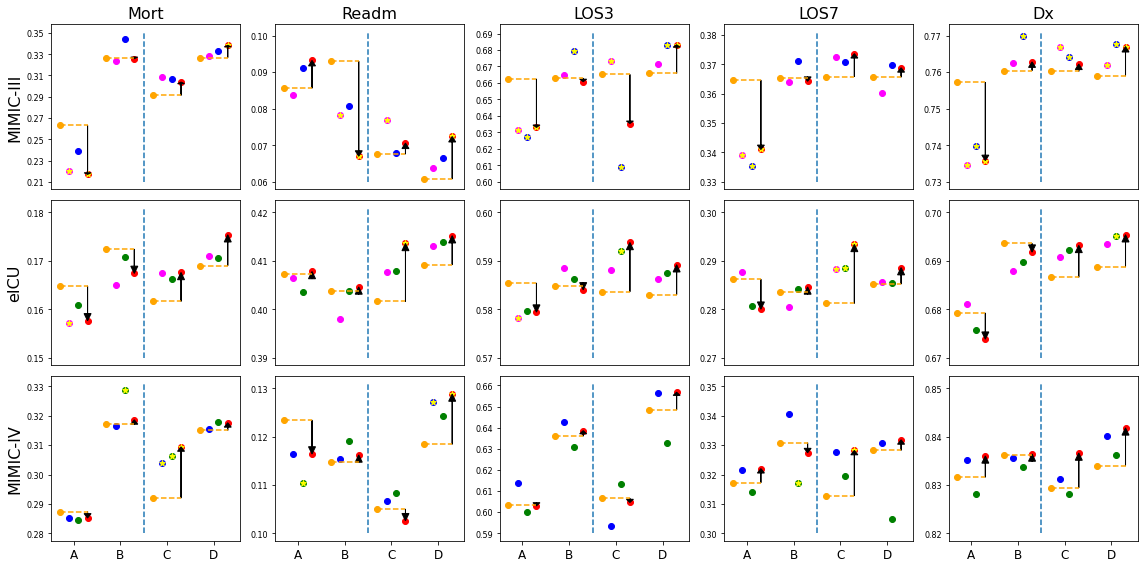

In [7]:
plt.figure(figsize=(16, 8))
grid = np.mgrid[0:4, 0:4][0]
datasets = ['MIMIC-III', 'eICU', 'MIMIC-IV']
for dataset in range(3): #dataset:
    for i, task in enumerate(df.index):
        plt.subplot(3,5, dataset*5+i+1)
        data = df.loc[task].values[dataset*16:dataset*16+16].reshape(4,4)
        data = data[[0,2,1,3],:]
        if dataset==0:
            #MIMIC3: 3-e, 3-4
            colors = ['orange','magenta','blue', 'red']
        elif dataset==1:
            #eICU: 3-e, 4-e
            colors = ['orange', 'magenta', 'green', 'red']
        elif dataset==2:
            #MIMIC4: 3-4, 4-e
            colors = ['orange', 'blue', 'green', 'red']

        for j in range(4):
            color = colors[j]
            plt.scatter(grid[:,j]+0.2*j-0.3, data[:,j], color=color)
            #            datasets[dataset], model: j, task: i, : : combination
            original = original_df.loc[task.lower()].values[:, dataset*16:dataset*16+16].reshape(5,4,4)[:,[0,2,1,3],:] # axis: seed,model, combination
            for k in range(4):
                if j!=0 and ttest_ind(original[:,k,0], original[:,k,j])[1]<0.05:
                    plt.scatter(grid[k,j]+0.2*j-0.3, data[k,j], color='yellow', marker='*')
            #     plt.scatter
        for j in [0]:
            colors = ['orange', "", "", 'red']
            for k in range(4):
                plt.plot([k-0.3+0.2*j, k+0.3], [data[k,j], data[k,j]], '--',color=colors[j])
        for j in range(4):
            plt.arrow(j+0.3, data[j,0], 0, data[j,3]-data[j,0], length_includes_head=True, head_width=0.15, head_length=0.0015, color='black')
        
        #plt.plot(grid[:,3], data[:,3], color=colors[3], alpha=0.3)
        #plt.plot(grid[:,0], data[:,0], color=markers[0], alpha=0.3)
        #plt.arrow(3, data[3,0], 0, data[3,3]-data[3,0], length_includes_head=True, head_width=0.15, head_length=0.0015, color='black')
        data_min = data.min() *100//1/100
        data_max = data.max() *100//1/100+0.011
        plt.plot([1.5, 1.5], [data_min, data_max], '--')
        ticks = np.arange(data_min, data_max, 0.01)
        if data_max - data_min > 0.1:
            ticks = np.arange(data_min, data_max, 0.02)
        plt.yticks(ticks)
        if dataset==2:
            plt.xticks(np.arange(4), labels=['A','B','C','D'])
        else:
            plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
        if dataset==0:
            plt.title(task)
        if i==0:
            plt.ylabel(datasets[dataset])
plt.tight_layout()

plt.savefig('vldb_pooled.pdf',format='pdf')

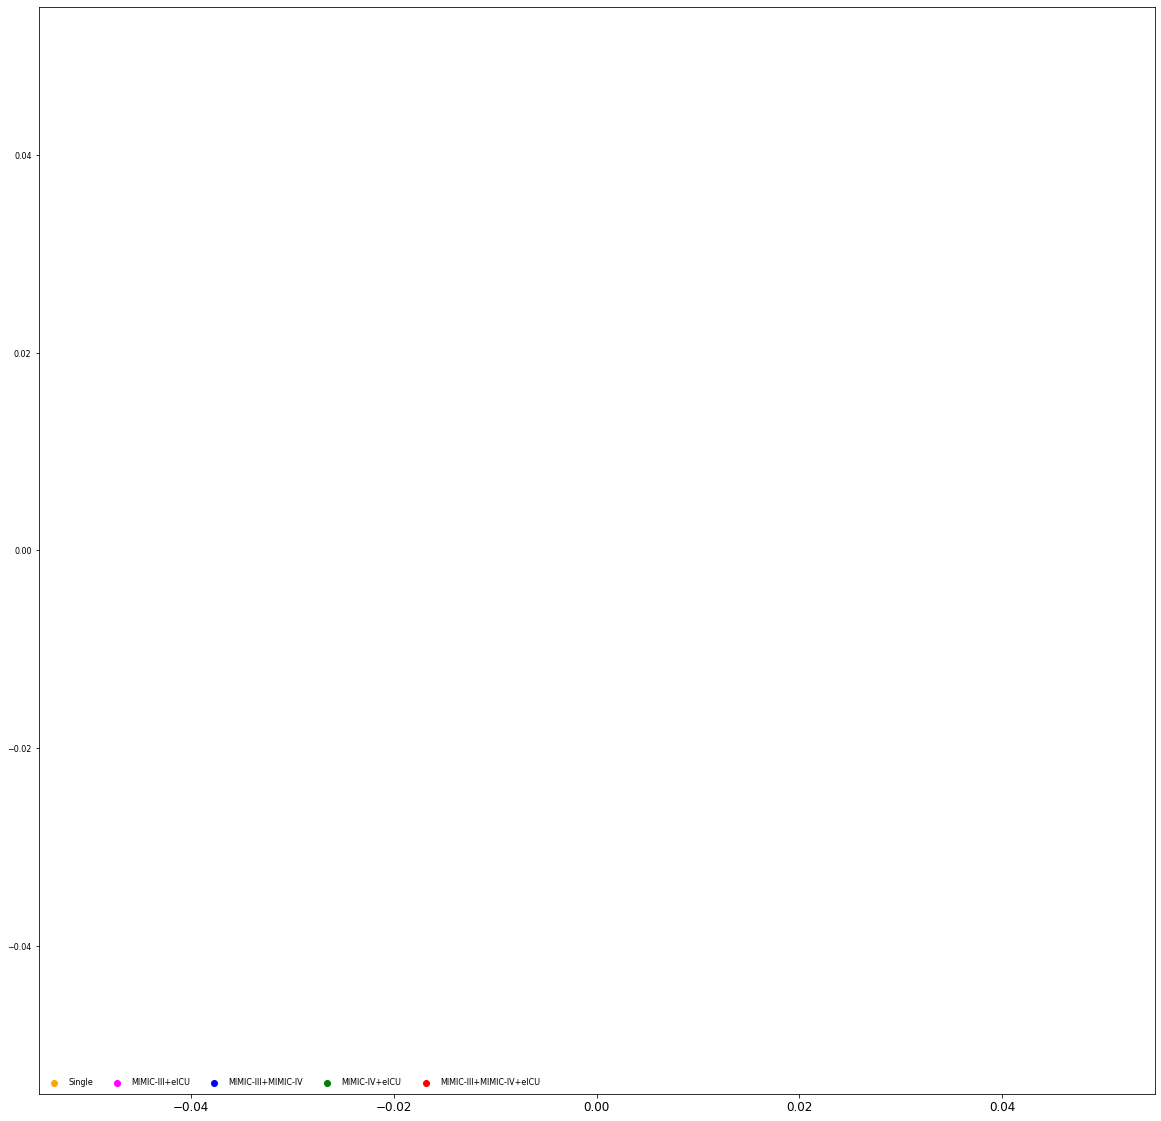

In [7]:
plt.figure(figsize=(20, 20))

for i in ['orange','magenta','blue', 'green', 'red']:
    plt.scatter([], [], color=i)

legend = plt.legend(labels=['Single', 'MIMIC-III+eICU', 'MIMIC-III+MIMIC-IV', 'MIMIC-IV+eICU', 'MIMIC-III+MIMIC-IV+eICU'], ncol=5, loc=3, framealpha=1, frameon=False)

fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('vldb_pooled_legend.pdf', format='pdf', bbox_inches=bbox)
plt.show()

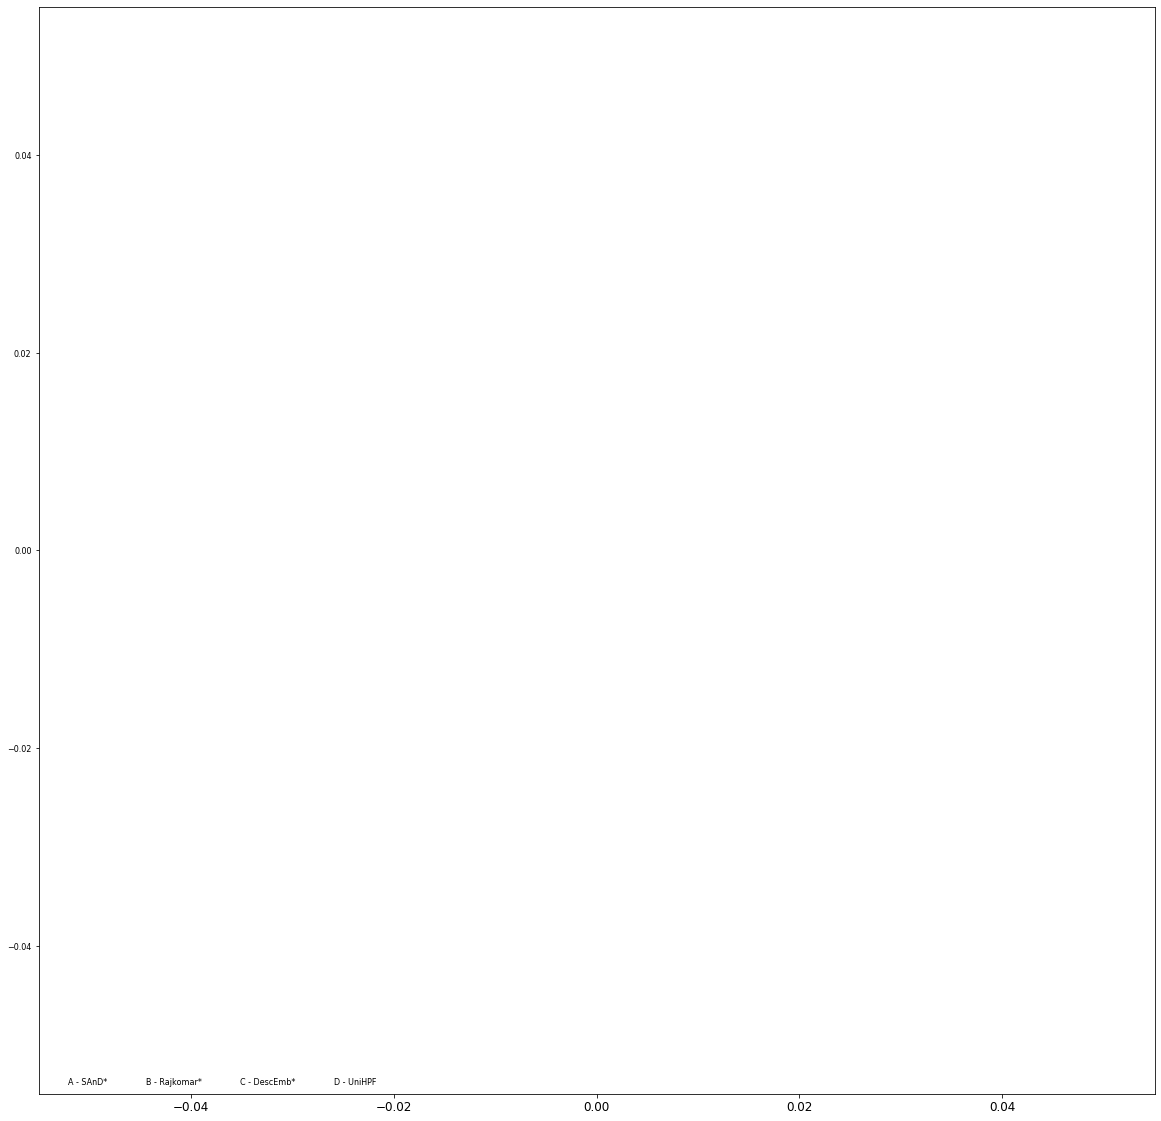

In [8]:
plt.figure(figsize=(20, 20))

for i in ['white', 'white', 'white', 'white']:
    plt.scatter([], [], marker='|', color=i)

legend = plt.legend(labels=['A - SAnD*', 'B - Rajkomar*', 'C - DescEmb*', "D - UniHPF"], ncol=5, loc=3, framealpha=1, frameon=False)

fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('vldb_pooled_model_legend.pdf', format='pdf', bbox_inches=bbox)
plt.show()